In [3]:
# List Installed Python Packages
!pip list | grep numpy

numpy                         1.21.5
numpydoc                      1.4.0


# **WORKSHOP II**

Lecture 2: Clustering lab - Machine learning II

By: Alvaro Gomez Penuela - 09/15/2023

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs # artificial cluster data
from sklearn.datasets import make_moons

from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn_extra.cluster import KMedoids
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting


## **Exercise 1**. Spectral Clustering

Spectral clustering is a technique used in machine learning and data analysis for clustering or partitioning a dataset into meaningful groups or clusters. It leverages the eigenvalues and eigenvectors of a similarity or affinity matrix derived from the data. The underlying idea is to transform the data into a new space where clustering is more apparent and can be achieved using standard clustering techniques like K-means.

/Users/alvarogomezpenuela/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


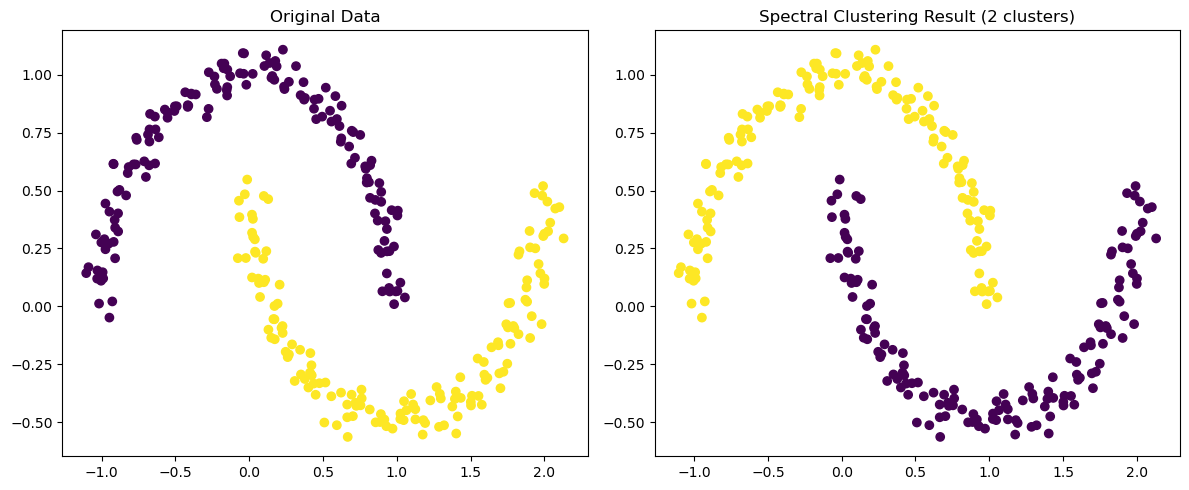

In [286]:
# Generate synthetic data
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Spectral clustering
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
y_spectral = spectral.fit_predict(X)

# Plot the data and Spectral Clustering result side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axs[0].set_title('Original Data')

# Plot Spectral Clustering result
axs[1].scatter(X[:, 0], X[:, 1], c=y_spectral, cmap='viridis')
axs[1].set_title('Spectral Clustering Result ({} clusters)'.format(n_clusters))

plt.tight_layout()
plt.show()


More details in PDF document

## **Exercise 2**. DBSCAN

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a popular density-based clustering algorithm used in machine learning and data analysis. It groups together data points that are close to each other in a high-dimensional space. 

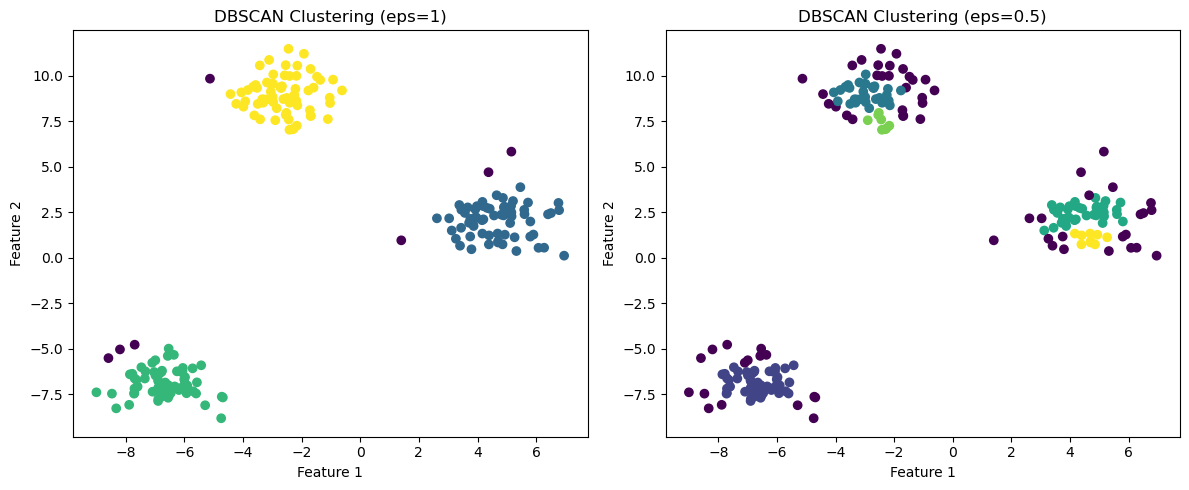

In [297]:
# Generate two blob datasets
X1, _ = make_blobs(n_samples=200, centers=3, cluster_std=1.0, random_state=42)
X2, _ = make_blobs(n_samples=200, centers=3, cluster_std=1.0, random_state=42)

# Apply DBSCAN with eps=1 for first dataset
dbscan1 = DBSCAN(eps=1, min_samples=5)
y_dbscan1 = dbscan1.fit_predict(X1)

# Apply DBSCAN with eps=0.5 for second dataset
dbscan2 = DBSCAN(eps=0.5, min_samples=5)
y_dbscan2 = dbscan2.fit_predict(X2)

# Plotting the results side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y_dbscan1, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering (eps=1)')

plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=y_dbscan2, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering (eps=0.5)')

plt.tight_layout()
plt.show()



In [303]:
n_clusters1 = len(set(y_dbscan1)) - (1 if -1 in y_dbscan1 else 0)
print(f'Number of clusters eps = 1.0: {n_clusters1}')

n_clusters2 = len(set(y_dbscan2)) - (1 if -1 in y_dbscan2 else 0)
print(f'Number of clusters eps = 0.5: {n_clusters2}')

Number of clusters eps = 1.0: 3
Number of clusters eps = 0.5: 5


More details in PDF document

## **Exercise 3**. Elbow Method, is it the suitable?

The elbow method is a technique used for finding the optimal number of clusters in a dataset for a clustering algorithm, such as k-means clustering. It helps determine the point at which the addition of more clusters does not significantly improve the variance within each cluster.

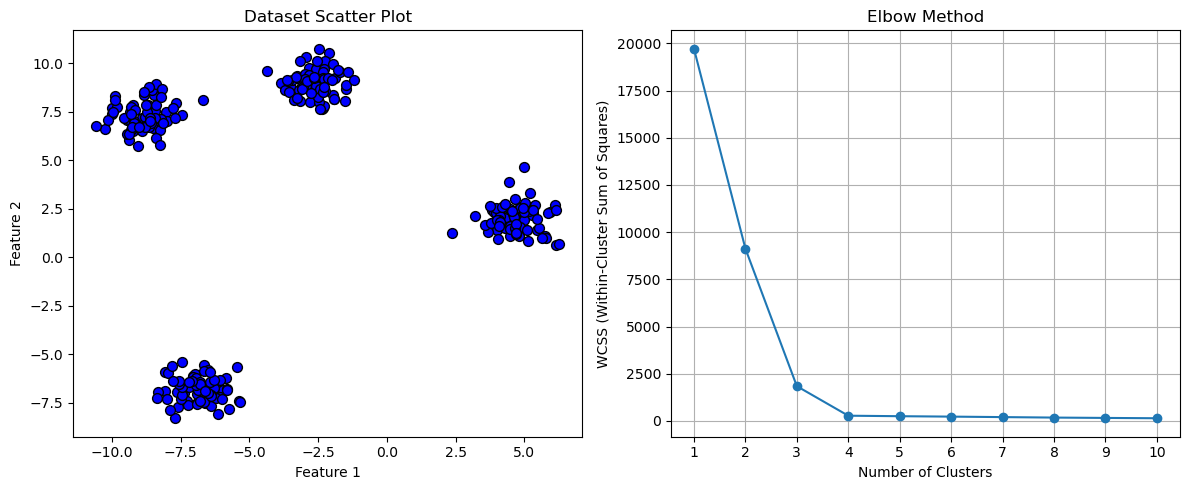

In [305]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.70)

# Calculate the sum of squared distances for a range of number of clusters
wcss = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the within-cluster sum of squares

# Plot the dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
plt.title('Dataset Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the elbow curve
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)

plt.tight_layout()
plt.show()

## **Exercise 4**. K-Meas & K-medoids with Numpy and Python

### K-Meas Clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The working of the K-Means algorithm is explained in the below steps:

1. Select a number of cluster K
2. Select random K points or centroids
3. Assign each data point to their closest centroid
4. Calculate the average distance between the centroid and all the points that belong to his cluster and place a new centroid in the mean
5. Repeat the third and fourth step


Time to roll up our sleeves and start coding

In [226]:
class custom_KMeans:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4, random_state=None):
        """
        Initialize the KMeans clustering model

        Parameters:
        - n_clusters: int, number of clusters to form.
        - max_iter: int, maximum number of iterations.
        - tol: float, convergence threshold. If the change in centroids is smaller than tol, the algorithm stops.
        - random_state: int or None, seed for random initialization of centroids.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None

    def fit(self, X):
        """
        Fit the KMeans model to the input data.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # Initialize centroids randomly from the data points
        n_samples, n_features = X.shape
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[indices]

        for iter in range(self.max_iter):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)

            # Update centroids by taking the mean of assigned data points
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def _assign_labels(self, X):
        """
        Assign each data point to the nearest centroid.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.

        Returns:
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """
        Update centroids by taking the mean of assigned data points.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.

        Returns:
        - new_centroids: numpy array, shape (n_clusters, n_features), updated centroids.
        """
        new_centroids = np.empty((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                # If no points are assigned to this centroid, keep it the same
                new_centroids[i] = self.centroids[i]
        return new_centroids

    def predict(self, X):
        """
        Predict cluster labels for input data.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.

        Returns:
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def fit_predict(self, X):
        """
        Fit the KMeans model to the input data and immediately predict cluster labels.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.

        Returns:
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.
        """
        self.fit(X)
        return self.predict(X)

Now let's test it with artificial data

In [227]:
# Generate synthetic data with three clusters
X, y = make_blobs(n_samples=300, n_features=2, centers=5, random_state=100)

# Create a KMeans instance with 3 and 5 clusters
kmeans_k3 = custom_KMeans(n_clusters=3, random_state=42)
kmeans_k5 = custom_KMeans(n_clusters=5, random_state=42)

# Fit the model to the data and predict cluster labels
labels_k3 = kmeans_k3.fit_predict(X)
labels_k5 = kmeans_k5.fit_predict(X)

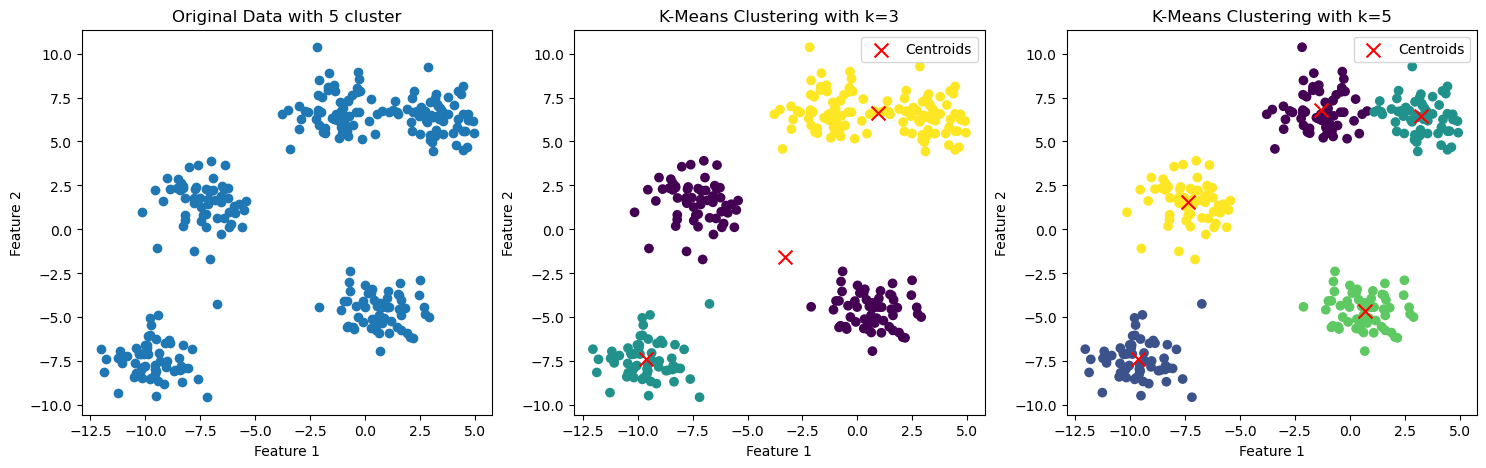

In [228]:
# Create subplots: one for the original data and one for K-Means clustering
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot the original data points
ax1.scatter(X[:, 0], X[:, 1], cmap='viridis')
ax1.set_title('Original Data with 5 cluster')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plot the data points with color-coded cluster assignments
ax2.scatter(X[:, 0], X[:, 1], c=labels_k3, cmap='viridis')
ax2.scatter(kmeans_k3.centroids[:, 0], kmeans_k3.centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
ax2.set_title('K-Means Clustering with k=3')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

# Plot the data points with color-coded cluster assignments
ax3.scatter(X[:, 0], X[:, 1], c=labels_k5, cmap='viridis')
ax3.scatter(kmeans_k5.centroids[:, 0], kmeans_k5.centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
ax3.set_title('K-Means Clustering with k=5')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.legend()

plt.show()

The original data was created with 5 clusters, and two K-Means models with matched and unmatched numbers of clusters were tested. The result clearly show the importance of defining well the numbers of cluster to achieve a better classification

### K-Medoids Clustering

k-medoid is based on medoids (which is a point that belongs to the dataset) calculating by minimizing the absolute distance between the points and the selected centroid, rather than minimizing the square distance. As a result, it's more robust to noise and outliers than k-means.

In [229]:
class custom_KMedoids:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4, random_state=None):
        """
        Initialize the KMedoids clustering model.

        Parameters:
        - n_clusters: int, number of clusters to form.
        - max_iter: int, maximum number of iterations.
        - tol: float, convergence threshold. If the change in medoids is smaller than tol, the algorithm stops.
        - random_state: int or None, seed for random initialization of medoids.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.medoids = None

    def fit(self, X):
        """
        Fit the KMedoids model to the input data.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)

        n_samples, _ = X.shape

        # Initialize medoids randomly from the data points
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.medoids = X[indices]

        for iter in range(self.max_iter):
            # Assign each data point to the nearest medoid
            labels = self._assign_labels(X)

            # Update medoids
            new_medoids = self._update_medoids(X, labels)

            # Check for convergence
            if np.all(np.abs(new_medoids - self.medoids) < self.tol):
                break

            self.medoids = new_medoids

    def _assign_labels(self, X):
        """
        Assign each data point to the nearest medoid.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.

        Returns:
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.medoids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_medoids(self, X, labels):
        """
        Update medoids by selecting the data point that minimizes the total dissimilarity within the cluster.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.

        Returns:
        - new_medoids: numpy array, shape (n_clusters, n_features), updated medoids.
        """
        new_medoids = np.empty((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            cluster_distances = np.sum(np.linalg.norm(cluster_points - cluster_points[:, np.newaxis], axis=2), axis=1)
            new_medoids[i] = cluster_points[np.argmin(cluster_distances)]
        return new_medoids

    def predict(self, X):
        """
        Predict cluster labels for input data.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.

        Returns:
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.medoids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def fit_predict(self, X):
        """
        Fit the KMedoids model to the input data and immediately predict cluster labels.

        Parameters:
        - X: numpy array, shape (n_samples, n_features), input data.

        Returns:
        - labels: numpy array, shape (n_samples,), cluster labels for each data point.
        """
        self.fit(X)
        return self.predict(X)


Now let's test it with the same K-Mean artificial data

In [230]:
# Create a KMedoid instance with 3 and 5 clusters
Kmedoids_k3 = custom_KMedoids(n_clusters=3, random_state=42)
Kmedoids_k5 = custom_KMedoids(n_clusters=5, random_state=42)

# Fit the model to the data and predict cluster labels
label_k3 = Kmedoids_k3.fit_predict(X)
label_k5 = Kmedoids_k5.fit_predict(X)

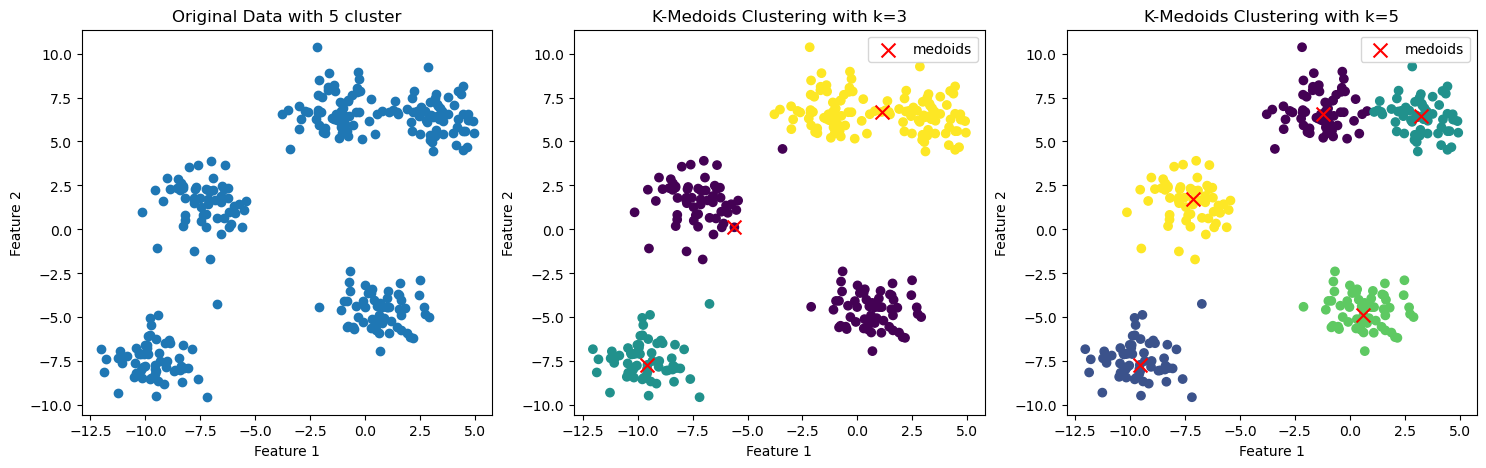

In [231]:
# Create subplots: one for the original data and one for K-Means clustering
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot the original data points
ax1.scatter(X[:, 0], X[:, 1], cmap='viridis')
ax1.set_title('Original Data with 5 cluster')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plot the data points with color-coded cluster assignments
ax2.scatter(X[:, 0], X[:, 1], c=label_k3, cmap='viridis')
ax2.scatter(Kmedoids_k3.medoids[:, 0], Kmedoids_k3.medoids[:, 1], c='red', marker='x', s=100, label='medoids')
ax2.set_title('K-Medoids Clustering with k=3')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

# Plot the data points with color-coded cluster assignments
ax3.scatter(X[:, 0], X[:, 1], c=label_k5, cmap='viridis')
ax3.scatter(Kmedoids_k5.medoids[:, 0], Kmedoids_k5.medoids[:, 1], c='red', marker='x', s=100, label='medoids')
ax3.set_title('K-Medoids Clustering with k=5')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.legend()

plt.show()

As in K-Means, a incorrect numbers of cluster (K) affect the quality of the clustering. In K = 3, the central point of the cluster is located quite different that in K-Means, it clearly shows the principle behind K-Medoids of using same data points as centers.

## **Exercise 5**. Applying K-Meas & K-medoids

a) Use the following code snippet to create scattered data X

In [232]:
from sklearn.datasets import make_blobs

XX, yy = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, 
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

b) Plot the resulting dataset. How many clusters are there? How far are they from one another?

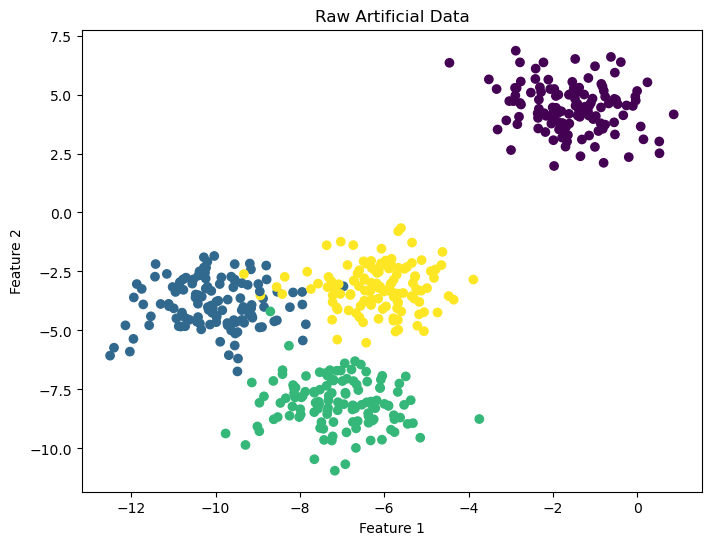

In [252]:
# Plot the raw data points
plt.figure(figsize=(8, 6))
plt.scatter(XX[:, 0], XX[:, 1], c=yy, cmap='viridis')
plt.title('Raw Artificial Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

R/ There are 4 cluster (as it was defined with centers=4). Blue, Yellow and Green clusters are close to each other, while the Puple one is away.

c) For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.

Note: K = 1 results in an error because K-Means requires at least two clusters to work

The Silhouette Method is a graphical and quantitative approach to finding the optimal number of clusters (K) for a dataset in clustering analysis. It helps you choose the number of clusters that maximizes the similarity within clusters and minimizes the similarity between clusters.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters, negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [280]:
# Iterate over different values of K (number of clusters)
k_values = [2, 3, 4, 5, 6]
silhouette_scores_kmeans = []
silhouette_scores_kmedoids = []

for k in k_values:
    # Handle the case when K=1
    if k == 1:
        silhouette_scores_kmeans.append(0)
        silhouette_scores_kmedoids.append(0) 
    else:
        # Initialize K-Means and K-Medoids models
        kmeans = custom_KMeans(n_clusters=k, random_state=42)
        kmedoids = custom_KMedoids(n_clusters=k, random_state=42)

        # Fit_predict the models to the data
        labels_kmeans = kmeans.fit_predict(XX)
        labels_kmedoids = kmedoids.fit_predict(XX)

        # Calculate silhouette scores
        silhouette_score_kmeans = silhouette_score(XX, labels_kmeans)
        silhouette_score_kmedoids = silhouette_score(XX, labels_kmedoids)

        silhouette_scores_kmeans.append(silhouette_score_kmeans)
        silhouette_scores_kmedoids.append(silhouette_score_kmedoids)


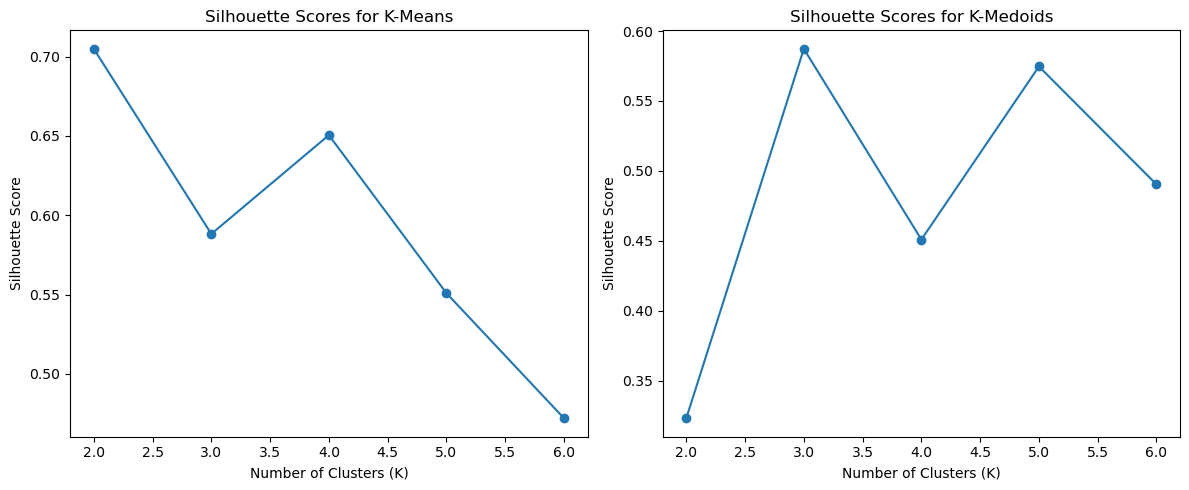

In [281]:
# Plot silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_kmeans, marker='o')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_kmedoids, marker='o')
plt.title('Silhouette Scores for K-Medoids')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [282]:
# Show the scores
silhouette_scores = pd.DataFrame({
    'K':k_values,
    'K-Means':silhouette_scores_kmeans,
    'K-Medoids': silhouette_scores_kmedoids
})

display(silhouette_scores)

,K,K-Means,K-Medoids
0,2,0.704979,0.322993
1,3,0.588200,0.587343
2,4,0.650519,0.450863
3,5,0.550841,0.574693
4,6,0.471942,0.490295


What number of K got the best silhouette score? What can you say about the figures? Is this the expected result?

R/ The K value with the highest silhouette score for K-Means is 2, while for K-Medoids is 3. It's because the random_state value, if we use random_state = 1, the optimal K is 2 for both as it's evident in the above plot. To analyze it better, let's plot both K = 2 and 3

In [274]:
# Create instances with 2 clusters
Kmeans_k2 = custom_KMeans(n_clusters=2, random_state=42)
Kmedoids_k2 = custom_KMedoids(n_clusters=2, random_state=42)

# Fit the model to the data and predict cluster labels
kmeans_label_k2 = Kmeans_k2.fit_predict(XX)
kmedoids_label_k2 = Kmedoids_k2.fit_predict(XX)

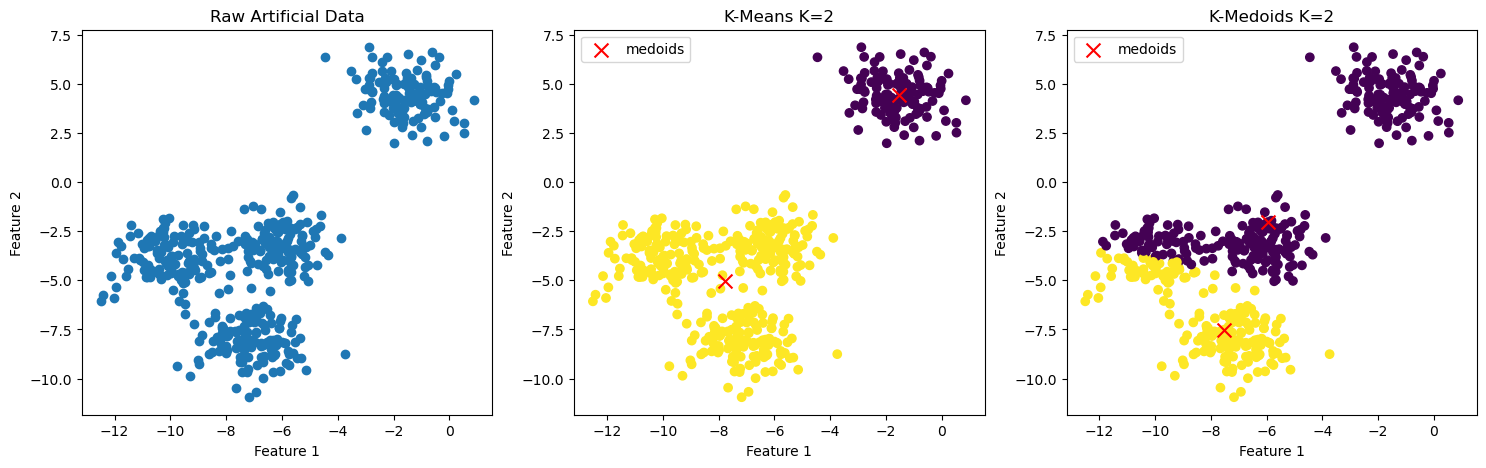

In [275]:
# Create subplots: one for the original data and one for K-Means clustering
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot the original data points
ax1.scatter(XX[:, 0], XX[:, 1], cmap='viridis')
ax1.set_title('Raw Artificial Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plot the data points with color-coded cluster assignments
ax2.scatter(XX[:, 0], XX[:, 1], c=kmeans_label_k2, cmap='viridis')
ax2.scatter(Kmeans_k2.centroids[:, 0], Kmeans_k2.centroids[:, 1], c='red', marker='x', s=100, label='medoids')
ax2.set_title('K-Means K=2')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

# Plot the data points with color-coded cluster assignments
ax3.scatter(XX[:, 0], XX[:, 1], c=kmedoids_label_k2, cmap='viridis')
ax3.scatter(Kmedoids_k2.medoids[:, 0], Kmedoids_k2.medoids[:, 1], c='red', marker='x', s=100, label='medoids')
ax3.set_title('K-Medoids K=2')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.legend()

plt.show()

k = 2 for K-Medoids generates a bad located center and thus the but result

In [276]:
# Create instances with 3 clusters
Kmeans_k3 = custom_KMeans(n_clusters=3, random_state=42)
Kmedoids_k3 = custom_KMedoids(n_clusters=3, random_state=42)

# Fit the model to the data and predict cluster labels
kmeans_label_k3 = Kmeans_k3.fit_predict(XX)
kmedoids_label_k3 = Kmedoids_k3.fit_predict(XX)

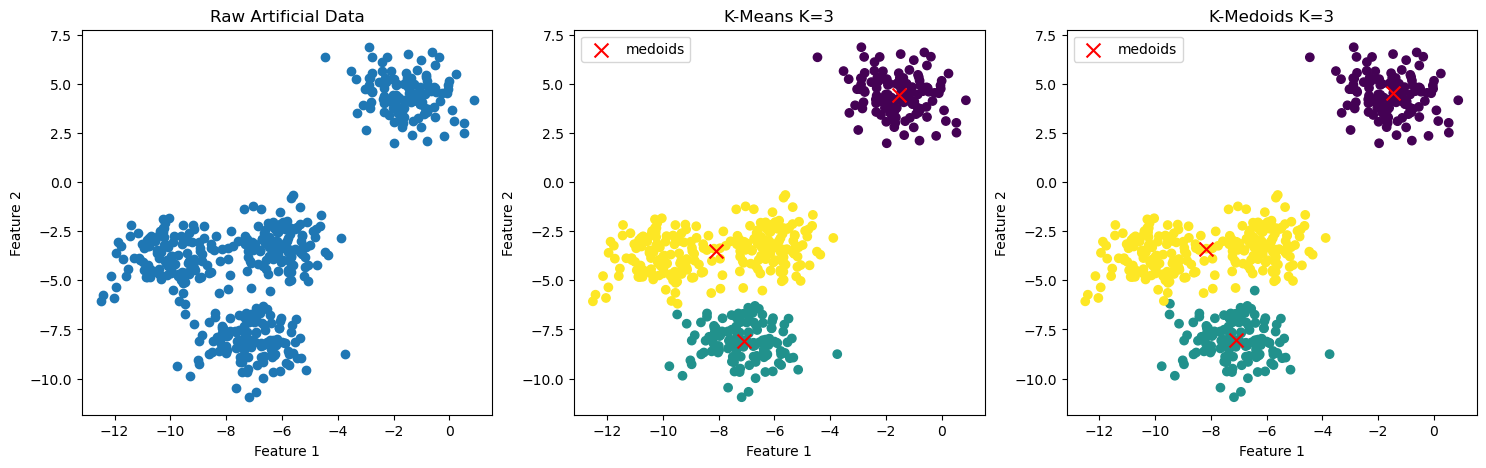

In [277]:
# Create subplots: one for the original data and one for K-Means clustering
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot the original data points
ax1.scatter(XX[:, 0], XX[:, 1], cmap='viridis')
ax1.set_title('Raw Artificial Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plot the data points with color-coded cluster assignments
ax2.scatter(XX[:, 0], XX[:, 1], c=kmeans_label_k3, cmap='viridis')
ax2.scatter(Kmeans_k3.centroids[:, 0], Kmeans_k3.centroids[:, 1], c='red', marker='x', s=100, label='medoids')
ax2.set_title('K-Means K=3')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

# Plot the data points with color-coded cluster assignments
ax3.scatter(XX[:, 0], XX[:, 1], c=kmedoids_label_k3, cmap='viridis')
ax3.scatter(Kmedoids_k3.medoids[:, 0], Kmedoids_k3.medoids[:, 1], c='red', marker='x', s=100, label='medoids')
ax3.set_title('K-Medoids K=3')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.legend()

plt.show()

Desglozar la medida S por cluster y por punto de datos

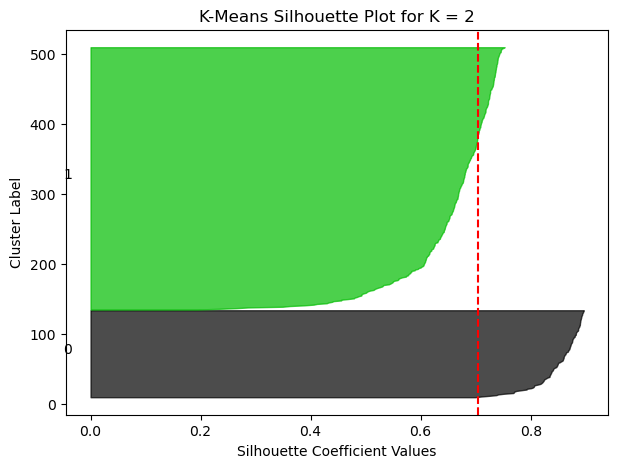

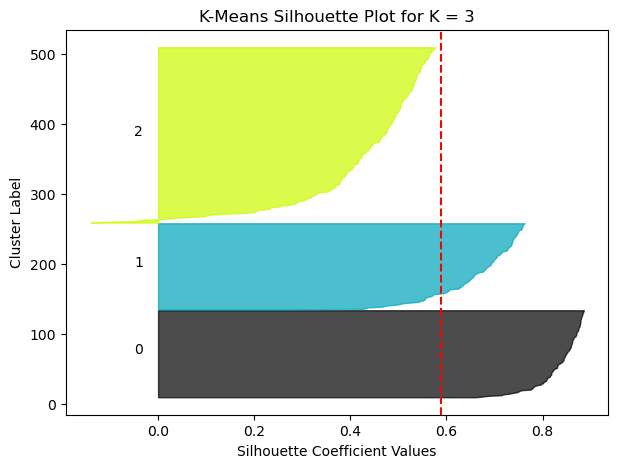

In [278]:
# Define the number of clusters (K)
k = [2,3]

for j in k:
    # Initialize K-Means clustering
    kmeans = custom_KMeans(n_clusters=j, random_state=42)
    labels = kmeans.fit_predict(XX)

    # Calculate silhouette scores for individual data points
    silhouette_values = silhouette_samples(XX, labels)

    # Create a plot of cluster labels vs. silhouette coefficients
    plt.figure(figsize=(7, 5))
    y_lower = 10

    for i in range(j):
        # Aggregate the silhouette scores for data points in cluster i
        cluster_silhouette_values = silhouette_values[labels == i]
        cluster_silhouette_values.sort()

        # Set the color for each cluster's silhouette plot
        color = plt.cm.nipy_spectral(float(i) / j)

        # Plot the silhouette coefficients for the data points in the cluster
        x = np.arange(len(cluster_silhouette_values))
        plt.fill_betweenx(x + y_lower, 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers
        plt.text(-0.05, x.mean() + y_lower, str(i))

        # Compute the new y_lower for the next plot
        y_lower += len(cluster_silhouette_values)

    # Set labels and title
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.title(f"K-Means Silhouette Plot for K = {j}")

    # The vertical line indicates the average silhouette score across all samples
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

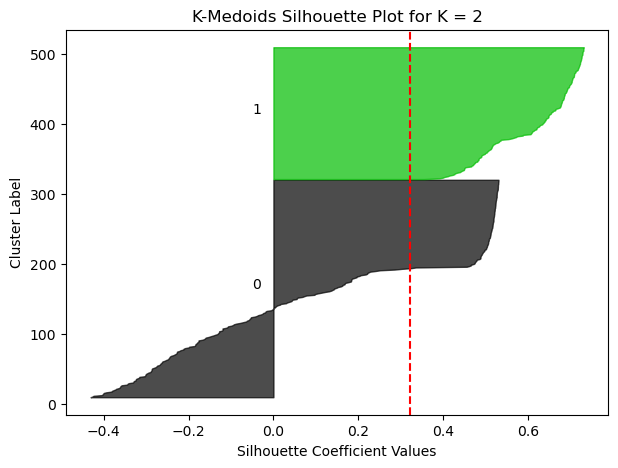

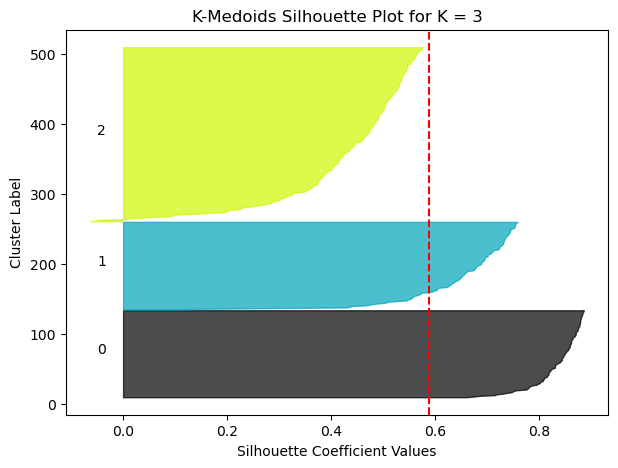

In [279]:
# Define the number of clusters (K)
k = [2,3]


for j in k:
    # Initialize K-Medoids clustering
    kmedoids = custom_KMedoids(n_clusters=j, random_state=42)
    labels = kmedoids.fit_predict(XX)

    # Calculate silhouette scores for individual data points
    silhouette_values = silhouette_samples(XX, labels)

    # Create a plot of cluster labels vs. silhouette coefficients
    plt.figure(figsize=(7, 5))
    y_lower = 10

    for i in range(j):
        # Aggregate the silhouette scores for data points in cluster i
        cluster_silhouette_values = silhouette_values[labels == i]
        cluster_silhouette_values.sort()

        # Set the color for each cluster's silhouette plot
        color = plt.cm.nipy_spectral(float(i) / j)

        # Plot the silhouette coefficients for the data points in the cluster
        x = np.arange(len(cluster_silhouette_values))
        plt.fill_betweenx(x + y_lower, 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers
        plt.text(-0.05, x.mean() + y_lower, str(i))

        # Compute the new y_lower for the next plot
        y_lower += len(cluster_silhouette_values)

    # Set labels and title
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.title(f"K-Medoids Silhouette Plot for K = {j}")

    # The vertical line indicates the average silhouette score across all samples
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()

## **Exercise 6**. Applying Sklearn Clustering Methods

a) Creating different types of scattered data

In [243]:
from sklearn import cluster, datasets, mixture
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============

n_samples = 500

# noisy_circles
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# noisy_moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

# Blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# no_structure
no_structure = np.random.rand(n_samples, 2), None

Plotting the created data

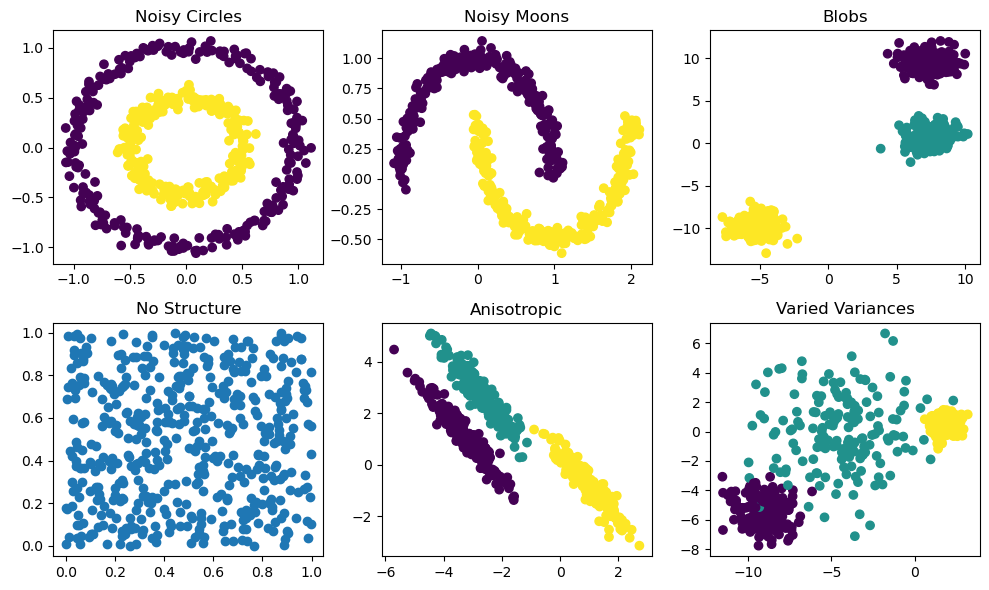

In [244]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Plot noisy_circles dataset
axs[0, 0].scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c=noisy_circles[1])
axs[0, 0].set_title("Noisy Circles")

# Plot noisy_moons dataset
axs[0, 1].scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c=noisy_moons[1])
axs[0, 1].set_title("Noisy Moons")

# Plot blobs dataset
axs[0, 2].scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1])
axs[0, 2].set_title("Blobs")

# Plot no_structure dataset
axs[1, 0].scatter(no_structure[0][:, 0], no_structure[0][:, 1])
axs[1, 0].set_title("No Structure")

# Plot aniso dataset
axs[1, 1].scatter(aniso[0][:, 0], aniso[0][:, 1], c=aniso[1])
axs[1, 1].set_title("Anisotropic")

# Plot varied dataset
axs[1, 2].scatter(varied[0][:, 0], varied[0][:, 1], c=varied[1])
axs[1, 2].set_title("Varied Variances")

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with subplots
plt.show()

It is observed that the data generated present different and complex distributions for certain clustering algorithms such as k-mean that are based on minimizing distances with respect to a center.

This is because several distributions do not have a center defined by cluster but are clusters made up of data sequences, for which the performance of algorithms based on sequences or densities can be better.

b) Applying k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset

In [245]:
# no_structure sin el None
no_structure = np.random.rand(n_samples, 2)

# List of datasets
datasets_list = [
    ("Noisy Circles", noisy_circles),
    ("Noisy Moons", noisy_moons),
    ("Blobs", blobs),
    ("Anisotropic", aniso),
    ("No Structure", no_structure),
    ("Varied Variances", varied)
]

/Users/alvarogomezpenuela/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Num of clusters: 2


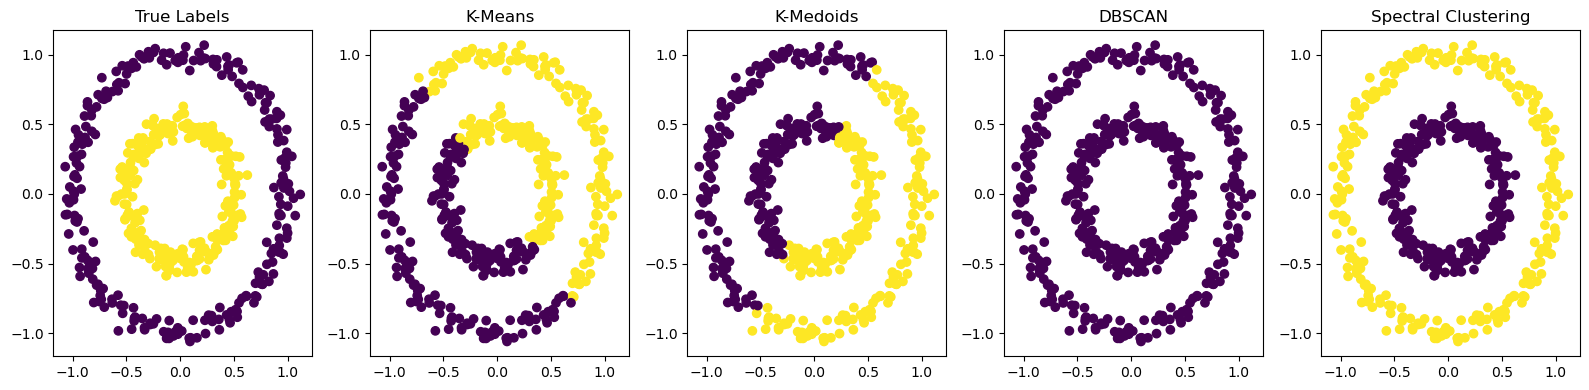

/Users/alvarogomezpenuela/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Num of clusters: 2


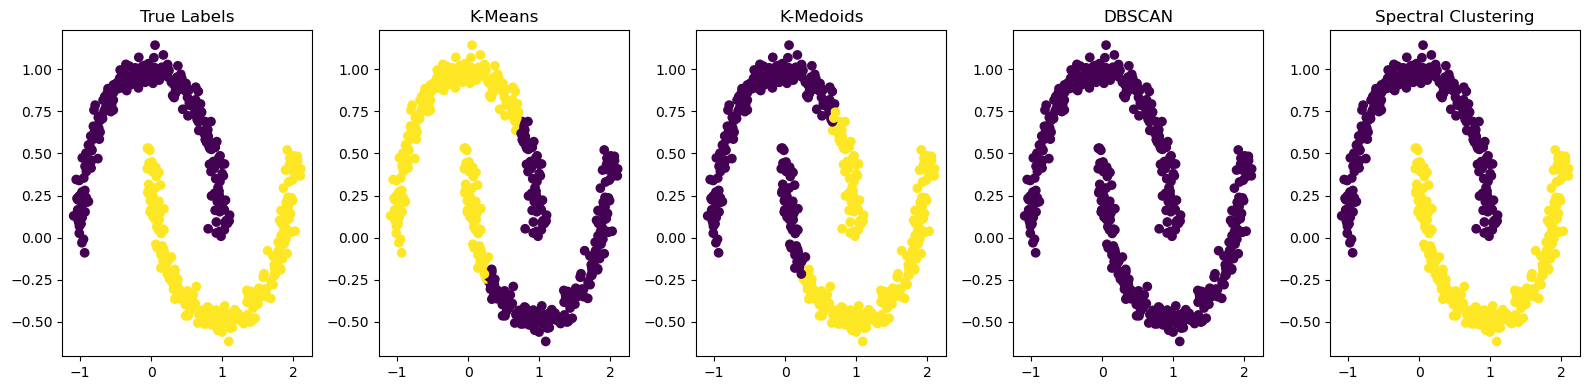

/Users/alvarogomezpenuela/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Num of clusters: 3


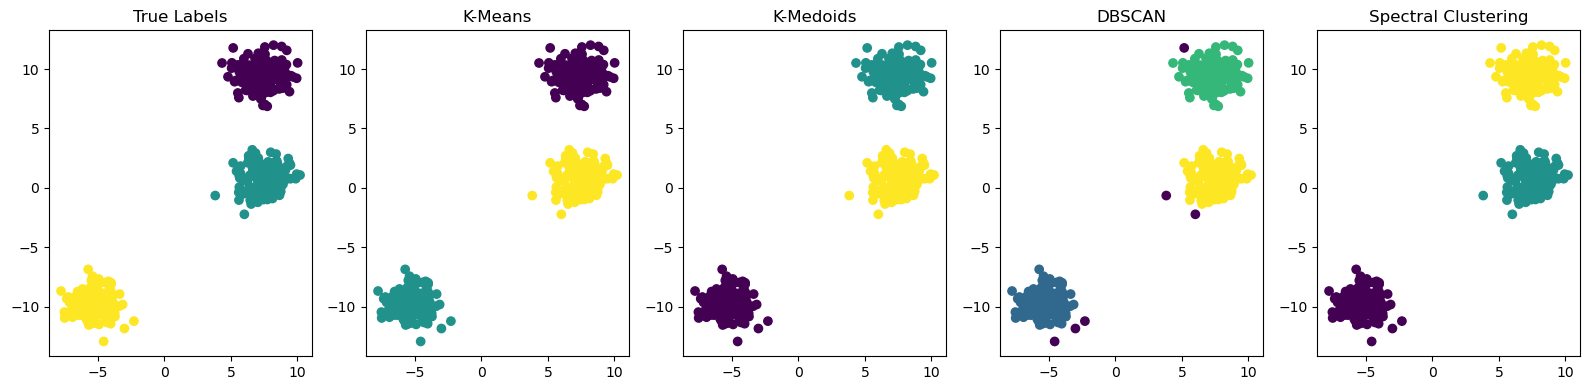

Num of clusters: 3


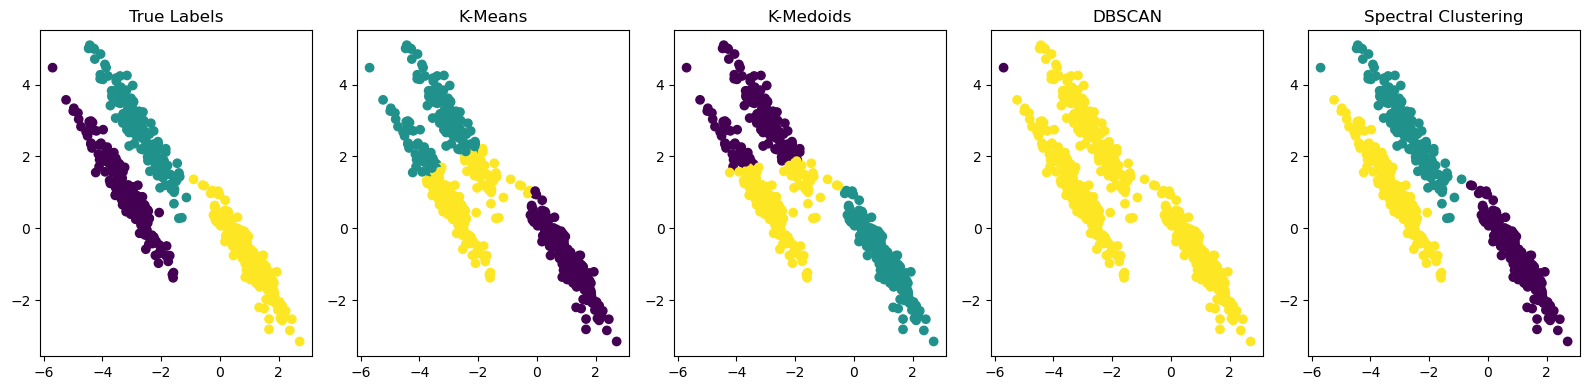

Num of clusters: 2


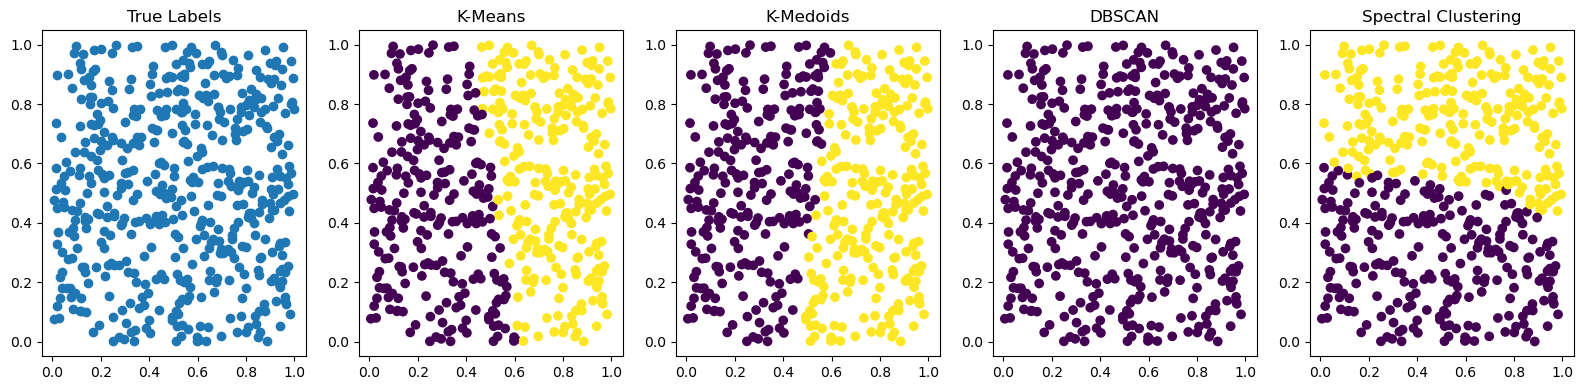

Num of clusters: 3


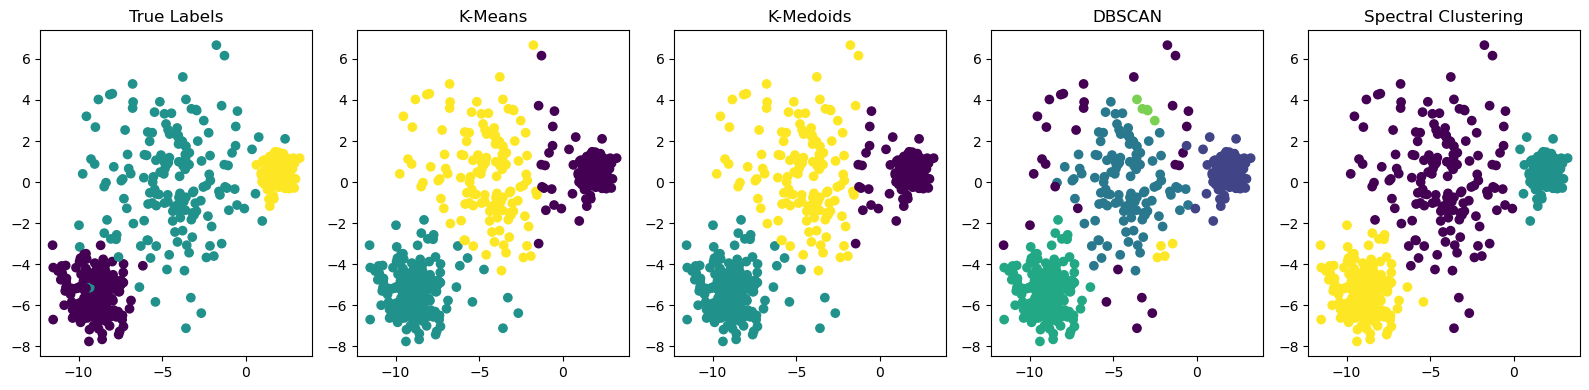

In [322]:
# Iterate through each dataset and apply clustering algorithms
for dataset_name, dataset_data in datasets_list:
    
    if dataset_name == "No Structure":
        X = no_structure
        true_labels = (1,2) # dos cluster para no structure
    else:
        X, true_labels = dataset_data
    
    n_cluster = len(np.unique(true_labels))

    # Apply K-Means
    kmeans_labels = KMeans(n_clusters=n_cluster, n_init=10).fit_predict(X)

    # Apply K-Medoids
    kmedoids_labels = KMedoids(n_clusters=n_cluster).fit_predict(X)

    # Apply DBSCAN
    dbscan_labels = DBSCAN(eps=1, min_samples=5).fit_predict(X)

    # Apply Spectral Clustering
    spectral_labels = SpectralClustering(n_clusters=n_cluster, eigen_solver='arpack', affinity="nearest_neighbors").fit_predict(X)

    # Print and visualize results
    print(f"Num of clusters: {n_cluster}")

    # Visualize the results (scatter plot for 2D datasets)
    if X.shape[1] == 2:
        plt.figure(figsize=(16, 4))
        plt.subplot(151)
        if dataset_name == "No Structure":
            plt.scatter(X[:, 0], X[:, 1])
        else:
            plt.scatter(X[:, 0], X[:, 1], c=true_labels)
        plt.title("True Labels")
        
        plt.subplot(152)
        plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
        plt.title("K-Means")
        
        plt.subplot(153)
        plt.scatter(X[:, 0], X[:, 1], c=kmedoids_labels)
        plt.title("K-Medoids")
        
        plt.subplot(154)
        plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
        plt.title("DBSCAN")

        plt.subplot(155)
        plt.scatter(X[:, 0], X[:, 1], c=spectral_labels)
        plt.title("Spectral Clustering")
        
        plt.tight_layout()
        plt.show()

Clustering is the task of grouping similar data points together based on certain criteria, and the distribution of the data affected how well a clustering algorithm can accurately identify these groups. In general, Spectral Clustering have the best performance in continous cluster like circles and moons, it also work well with separate and high density egg clusters. BDSCAN did a good job with not too spread data, while k-means and k-medoids go well with egg-like distributed clusters.

An addiotional challenge is the metrics, because silhouette won't represents a right measure of the quality of the cluster when they are not arround a center like moons